<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/Taylor_cleaned_variable_w_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
df = pd.read_csv("./selected_gss_data.csv", low_memory = False)
import pandas as pd
import numpy as np
df1 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet', engine='pyarrow')
df2 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet', engine='pyarrow')
df3 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet', engine='pyarrow')


In [ ]:
df1_og = df1
df2_og = df2
df3_og = df3

In [ ]:
df1['age_category'] = df1['age']
df2['age_category'] = df2['age']
df3['age_category'] = df3['age']

In [ ]:
for df in [df1, df2, df3]:
  df.loc[(df['age'] >= 18) & (df['age'] <= 29), 'age_category'] = 1
  df.loc[(df['age'] >= 30) & (df['age'] <= 39), 'age_category'] = 2
  df.loc[(df['age'] >= 40) & (df['age'] <= 49), 'age_category'] = 3
  df.loc[(df['age'] >= 50) & (df['age'] <= 64), 'age_category'] = 4
  df.loc[(df['age'] >= 60) & (df['age'] <= 89), 'age_category'] = 5

In [ ]:
for df in [df1, df2, df3]:
  df['age'].replace(0, np.nan)
  df['age_category'].replace(0, np.nan)

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index = True )

In [ ]:
age_category = df['age_category']
print(age_category.value_counts())

5.0    18388
2.0    14994
1.0    14360
3.0    12799
4.0    11080
Name: age_category, dtype: int64


In [ ]:
polviews = df['polviews']
polviews = polviews.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
polviews.value_counts()

moderate, middle of the road    23992
slightly conservative            9596
conservative                     9361
slightly liberal                 7900
liberal                          7623
extremely conservative           2165
extremely liberal                2081
Name: polviews, dtype: int64

In [ ]:
df['polviews'] = polviews

In [ ]:
print(df['relig'].value_counts())

protestant                       40125
catholic                         17242
none                              9895
jewish                            1421
other                             1224
christian                         1000
buddhism                           272
muslim/islam                       201
orthodox-christian                 176
inter-nondenominational            159
hinduism                           158
other eastern religions             44
native american                     36
not imputable_(2147483638)           0
not available in this year           0
not available in this release        0
uncodeable                           0
skipped on web                       0
refused                              0
don't know                           0
not imputable_(2147483637)           0
no answer                            0
dk, na, iap                          0
I don't have a job                   0
iap                                  0
see codebook             

In [ ]:
relig = df['relig']
relig = relig.replace(['not imputable_(2147483638)' ,
                       'not available in this year' ,
                       'not available in this release' ,
                       'uncodeable' ,
                       'skipped on web' ,
                       'refused' ,
                       "don't know" ,
                       'not imputable_(2147483637)' ,
                       'no answer' ,
                       'dk, na, iap' ,
                       "I don't have a job" ,
                       'iap' ,
                       'see codebook'], np.nan)
relig.value_counts()

protestant                 40125
catholic                   17242
none                        9895
jewish                      1421
other                       1224
christian                   1000
buddhism                     272
muslim/islam                 201
orthodox-christian           176
inter-nondenominational      159
hinduism                     158
other eastern religions       44
native american               36
Name: relig, dtype: int64

In [ ]:
relig = relig.replace(['christian', 'inter-nondenominational', 'orthodox-christian'], 'christianity')
relig = relig.replace(['none', 'other', 'other eastern religions'], 'none/other')
relig.value_counts()

protestant         40125
catholic           17242
none/other         11163
jewish              1421
christianity        1335
buddhism             272
muslim/islam         201
hinduism             158
native american       36
Name: relig, dtype: int64

In [ ]:
df['relig'] = relig

In [ ]:
import numpy as np
cappun = df['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
cappun.value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

In [ ]:
print(df['cappun'].value_counts())

favor                            42181
oppose                           18666
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: cappun, dtype: int64


In [ ]:
df['cappun'] = cappun

In [ ]:
print(pd.crosstab(cappun,relig),'\n')
print(pd.crosstab(cappun,polviews),'\n')
print(pd.crosstab(cappun,age_category, normalize = 'all'),'\n')

relig   protestant  catholic  jewish  none/other  buddhism  hinduism  \
cappun                                                                 
favor        24119     10144     772        5916       121        73   
oppose        9433      4378     384        3708       107        63   

relig   muslim/islam  christianity  native american  
cappun                                               
favor             93           714               16  
oppose            81           382               15   

polviews  extremely liberal  liberal  slightly liberal  \
cappun                                                   
favor                   820     3661              4551   
oppose                 1136     3361              2760   

polviews  moderate, middle of the road  slightly conservative  conservative  \
cappun                                                                        
favor                            15752                   6789          6968   
oppose                 

In [ ]:
df.loc[:,['age_category','polviews','cappun']].groupby(['age_category', 'polviews']).describe()

cappun                     
                                           count unique     top  freq
age_category polviews                                                
1.0          extremely liberal               449      2  oppose   273
             liberal                        1710      2   favor   959
             slightly liberal               1813      2   favor  1101
             moderate, middle of the road   4453      2   favor  3143
             slightly conservative          1598      2   favor  1180
             conservative                   1214      2   favor   938
             extremely conservative          245      2   favor   179
2.0          extremely liberal               448      2  oppose   244
             liberal                        1558      2   favor   804
             slightly liberal               1778      2   favor  1133
             moderate, middle of the road   4535      2   favor  3321
             slightly conservative          1945      2   favor  1525
             conservative                   1551      2   favor  1216
             extremely conservative          329      2   favor   262
3.0          extremely liberal               322      2  oppose   169
             liberal                        1206      2   favor   650
             slightly liberal               1280      2   favor   809
             moderate, middle of the road   3798      2   favor  2822
             slightly conservative          1717      2   favor  1319
             conservative                   1559      2   favor  1246
             extremely conservative          329      2   favor   265
4.0          extremely liberal               289      2  oppose   178
             liberal                         944      2   favor   490
             slightly liberal                948      2   favor   609
             moderate, middle of the road   3319      2   favor  2396
             slightly conservative          1420      2   favor  1075
             conservative                   1518      2   favor  1236
             extremely conservative          372      2   favor   296
5.0          extremely liberal               420      2  oppose   251
             liberal                        1529      2  oppose   795
             slightly liberal               1441      2   favor   875
             moderate, middle of the road   5526      2   favor  3916
             slightly conservative          2166      2   favor  1639
             conservative                   2755      2   favor  2251
             extremely conservative          710      2   favor   566

In [ ]:
df.loc[:,['age_category','relig','cappun']].groupby(['age_category', 'relig']).describe()

cappun                     
                              count unique     top  freq
age_category relig                                      
1.0          protestant        5809      2   favor  4028
             catholic          3066      2   favor  2105
             jewish             165      2   favor   100
             none/other        2740      2   favor  1661
             buddhism            39      2   favor    25
             hinduism            32      2   favor    18
             muslim/islam        37      2  oppose    19
             christianity       221      2   favor   131
             native american      8      2   favor     6
2.0          protestant        6407      2   favor  4663
             catholic          3122      2   favor  2259
             jewish             199      2   favor   123
             none/other        2456      2   favor  1497
             buddhism            51      2   favor    30
             hinduism            42      2   favor    23
             muslim/islam        58      2   favor    31
             christianity       304      2   favor   194
             native american      5      2  oppose     4
3.0          protestant        5824      2   favor  4275
             catholic          2524      2   favor  1784
             jewish             182      2   favor   122
             none/other        1706      2   favor  1118
             buddhism            43      2  oppose    25
             hinduism            25      2  oppose    16
             muslim/islam        40      2  oppose    21
             christianity       227      2   favor   158
             native american      9      2  oppose     7
4.0          protestant        5451      2   favor  3923
             catholic          2140      2   favor  1512
             jewish             190      2   favor   131
             none/other        1162      2   favor   740
             buddhism            35      2   favor    22
             hinduism             9      2   favor     5
             muslim/islam        25      2   favor    16
             christianity       174      2   favor   117
             native american      3      1   favor     3
5.0          protestant        9797      2   favor  7059
             catholic          3545      2   favor  2410
             jewish             404      2   favor   285
             none/other        1416      2   favor   823
             buddhism            56      2  oppose    32
             hinduism            20      2   favor    12
             muslim/islam         9      2   favor     5
             christianity       146      2   favor   103
             native american      6      2   favor     4

In [ ]:
df.loc[:,['cappun','age_category']].groupby('cappun').describe()

age_category                                             
              count      mean       std  min  25%  50%  75%  max
cappun                                                          
favor       41773.0  3.070380  1.473286  1.0  2.0  3.0  5.0  5.0
oppose      18399.0  3.010761  1.501817  1.0  2.0  3.0  5.0  5.0

In [ ]:
polviews.value_counts()

moderate, middle of the road    23992
slightly conservative            9596
conservative                     9361
slightly liberal                 7900
liberal                          7623
extremely conservative           2165
extremely liberal                2081
Name: polviews, dtype: int64

In [ ]:
categories = np.array([1,2,3,4,5,6,7])

df['polview_value'] = df['polviews']

df['polview_value'] = pd.Categorical(
   df['polview_value'], categories=categories, ordered=True)

df.loc[(df['polviews'] == 'extremely liberal'), 'polview_value'] = 1
df.loc[(df['polviews'] == 'liberal'), 'polview_value'] = 2
df.loc[(df['polviews'] == 'slightly liberal'), 'polview_value'] = 3
df.loc[(df['polviews'] == 'moderate, middle of the road'), 'polview_value'] = 4
df.loc[(df['polviews'] == 'slightly conservative'), 'polview_value'] = 5
df.loc[(df['polviews'] == 'conservative'), 'polview_value'] = 6
df.loc[(df['polviews'] == 'extremely conservative'), 'polview_value'] = 7

df['polview_value'].value_counts()


<ipython-input-23-ceaaa27aa669>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['polview_value'] = df['polviews']


4    23992
5     9596
6     9361
3     7900
2     7623
7     2165
1     2081
Name: polview_value, dtype: int64

In [ ]:
df['cappun_value'] = df['cappun']

df['cappun_value'] = pd.Categorical(
   df['cappun_value'], categories=categories, ordered=True)

df.loc[(df['cappun'] == 'favor'), 'cappun_value'] = 1
df.loc[(df['cappun'] == 'oppose'), 'cappun_value'] = 2

df['cappun'].value_counts()

<ipython-input-24-8dc176eb3fe5>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cappun_value'] = df['cappun']


favor     42181
oppose    18666
Name: cappun, dtype: int64

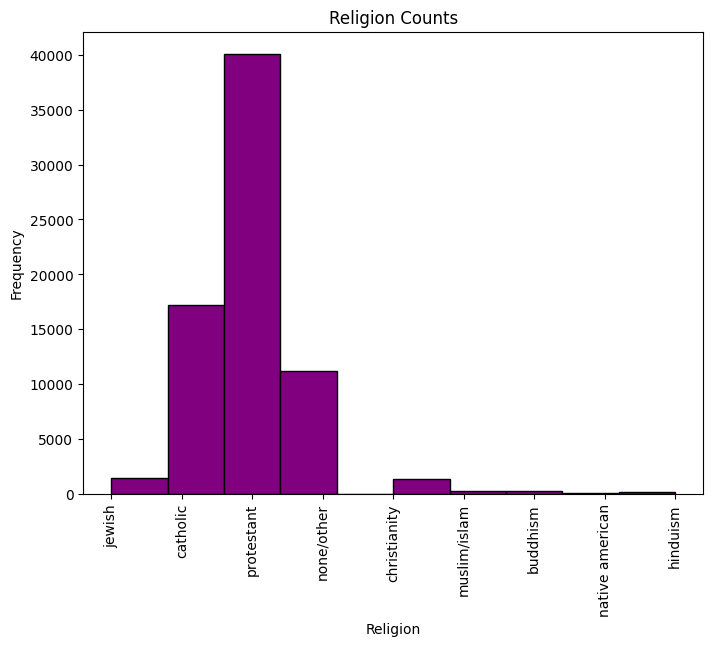

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['relig'].hist(color='purple', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.title('Religion Counts')
plt.grid(False)
plt.show()

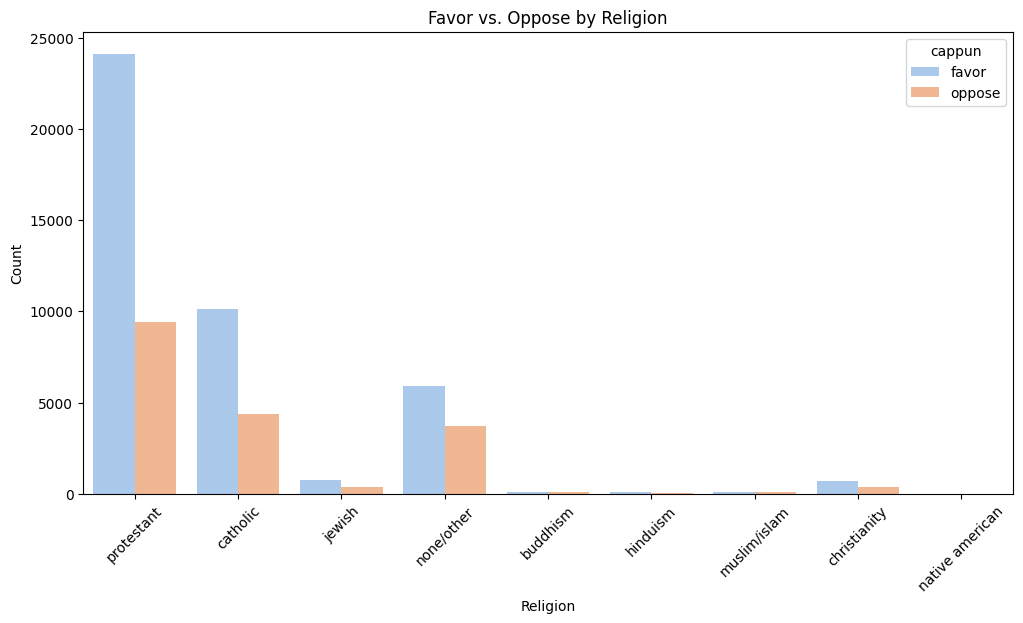

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(cappun,relig)

ct_reset = ct.reset_index()

long_df = ct_reset.melt(id_vars='cappun', var_name='religion', value_name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='religion', y='count', hue='cappun', palette='pastel')

plt.title('Favor vs. Oppose by Religion')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

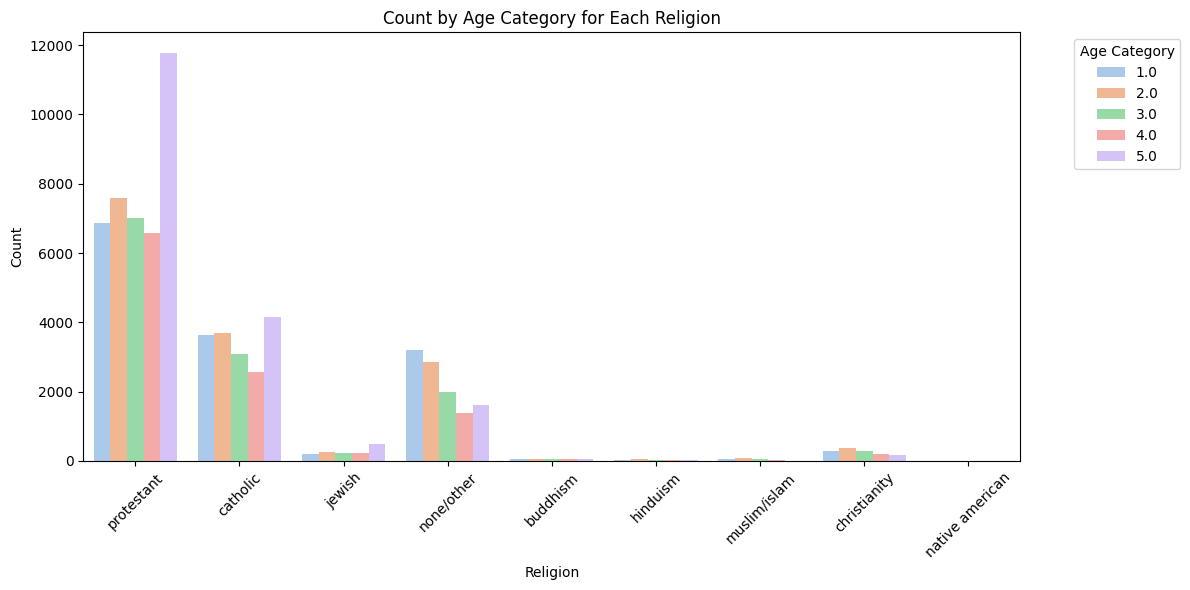

In [ ]:
counts = pd.crosstab(df['relig'], df['age_category'])
counts_reset = counts.reset_index()
long_df = counts_reset.melt(id_vars='relig', var_name='age_category', value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='relig', y='count', hue='age_category', palette='pastel')
plt.title('Count by Age Category for Each Religion')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

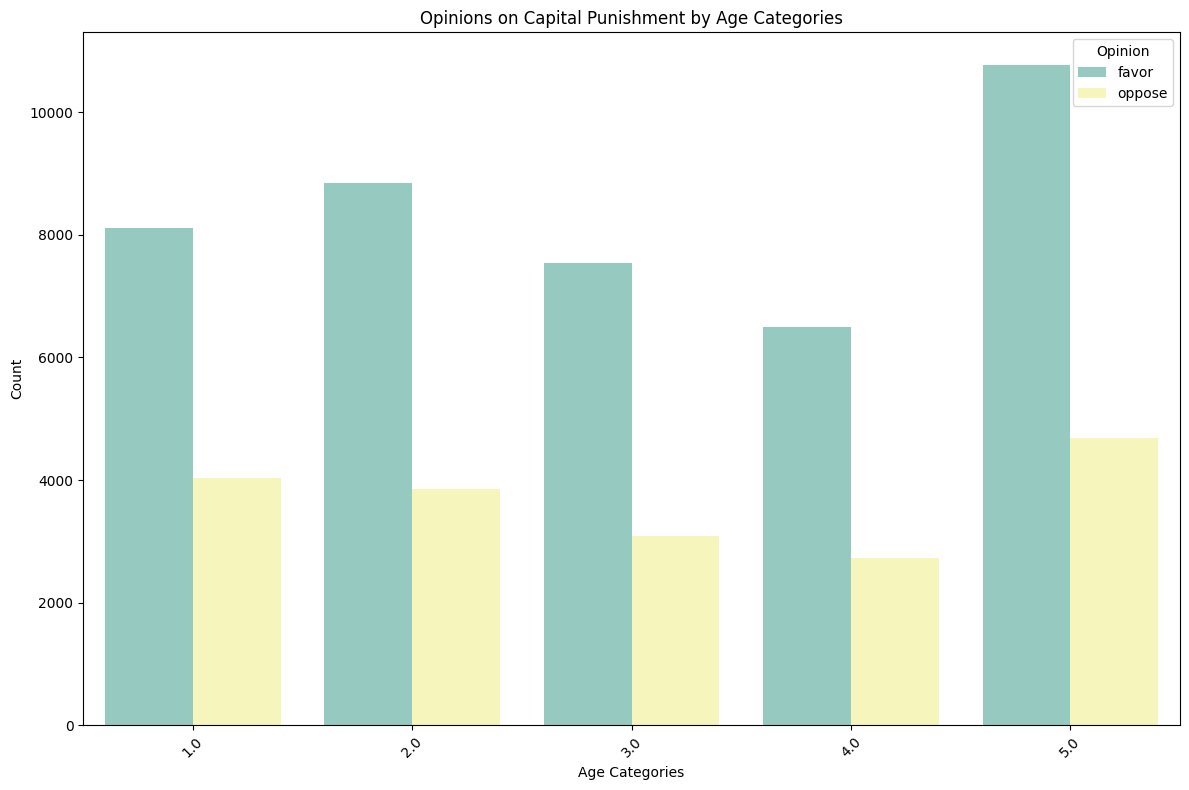

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=age_category, hue=cappun, hue_order=['favor', 'oppose'], palette='Set3')

# Adding title and labels
plt.title('Opinions on Capital Punishment by Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count')

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Opinion', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print(pd.crosstab(cappun,polviews),'\n')
# counts = pd.crosstab(df['relig'], df['age_category'])
# sns.boxplot(data=df, y=counts)

polviews  extremely liberal  liberal  slightly liberal  \
cappun                                                   
favor                   820     3661              4551   
oppose                 1136     3361              2760   

polviews  moderate, middle of the road  slightly conservative  conservative  \
cappun                                                                        
favor                            15752                   6789          6968   
oppose                            6132                   2125          1733   

polviews  extremely conservative  
cappun                            
favor                       1598  
oppose                       423   

